# MedCAT tutorial - Dataset Analysis and Preparation

Welcome to the MedCAT tutorials!

First before be begin extracting information from with patient records.
As with the begining of every datascience project. Let's explore the data that we are dealing with.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Datasets

If you are using MIMIC-III you will have the create the create the `patients.csv` and `noteevents.csv` and place them into the folder specified below. How to prepare the CSV files is explained in the blog post [MedCAT | Dataset Analysis and Preparation](https://towardsdatascience.com/medcat-dataset-analysis-and-preparation-be8bc910bd6d).

In [3]:
DATA_DIR = "./data/"

### Download the data (only if using the pre-made datasets and not MIMIC-III)

In [4]:
# Load files if in google colab, otherwise skip this step
! wget https://raw.githubusercontent.com/CogStack/MedCATtutorials/main/notebooks/introductory/data/noteevents.csv -P ./data/
! wget https://raw.githubusercontent.com/CogStack/MedCATtutorials/main/notebooks/introductory/data/patients.csv -P ./data/

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


### Set plot sizes and style

In [5]:
# Set size and color for plots
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(4,5)}, 
    style="white"
)

## Statistics on patients

In [6]:
patients = pd.read_csv("PATIENTS.csv")
patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


C:\Users\morio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


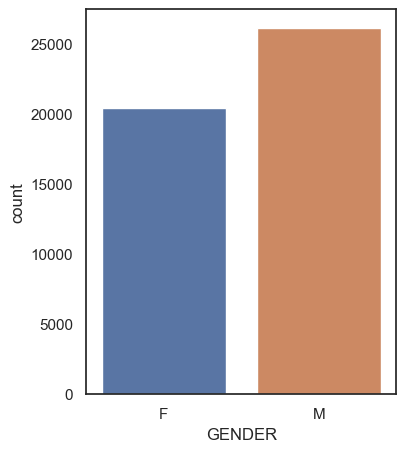

In [7]:
sns.countplot(patients['GENDER'])
plt.show()

In [8]:
print(f"Total number of patients: {len(patients)}")
print(f"Male: {len(patients[patients['GENDER'] == 'M'])}")
print(f"Female: {len(patients[patients['GENDER'] == 'F'])}")

Total number of patients: 46520
Male: 26121
Female: 20399


## Statistics on note events

Note: This dataset is large and requires a bit more RAM to fully load into memory.

In [9]:
# Set size and color for plots
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(10,6)}, 
    style="white"
)

In [10]:
noteevents = pd.read_csv("NOTEEVENTS.csv")
noteevents.head()

C:\Users\morio\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [13]:
noteevents.CATEGORY

0          Discharge summary
1          Discharge summary
2          Discharge summary
3          Discharge summary
4          Discharge summary
                 ...        
2083175        Nursing/other
2083176        Nursing/other
2083177        Nursing/other
2083178        Nursing/other
2083179        Nursing/other
Name: CATEGORY, Length: 2083180, dtype: object

In [14]:
# The column 'noteevents' contains the free text / unstructured text body of the document
print(noteevents.TEXT.iloc[0])

Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]


Service:
ADDENDUM:

RADIOLOGIC STUDIES:  Radiologic studies also included a chest
CT, which confirmed cavitary lesions in the left lung apex
consistent with infectious process/tuberculosis.  This also
moderate-sized left pleural effusion.

HEAD CT:  Head CT showed no intracranial hemorrhage or mass
effect, but old infarction consistent with past medical
history.

ABDOMINAL CT:  Abdominal CT showed lesions of
T10 and sacrum most likely secondary to osteoporosis. These can
be followed by repeat imaging as an outpatient.



                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]

Dictated By:[**Hospital 1807**]
MEDQUIST36

D:  [**2151-8-5**]  12:11
T:  [**2151-8-5**]  12:21
JOB#:  [**Job Number 1808**]



In [15]:
noteevents_original = noteevents.copy()

C:\Users\morio\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


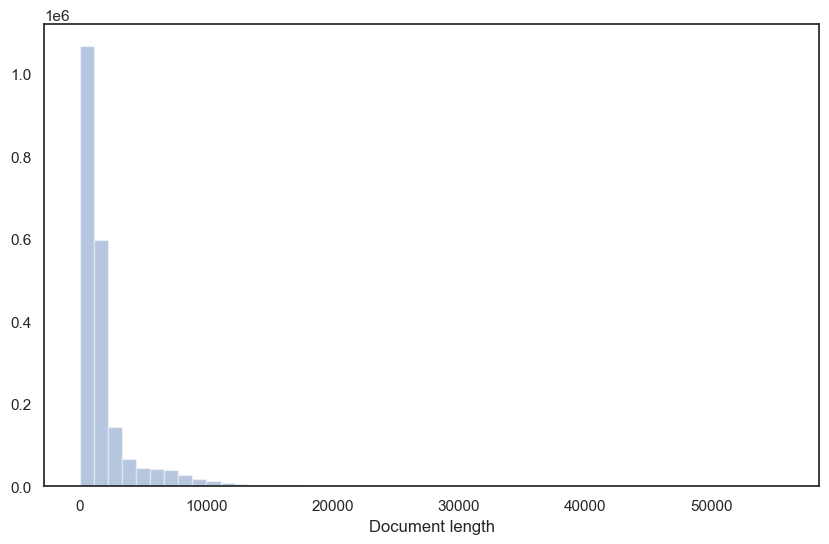

In [17]:
lns = noteevents.TEXT.str.len().tolist()
sns.distplot(lns, kde=False, axlabel='Document length')
plt.show()

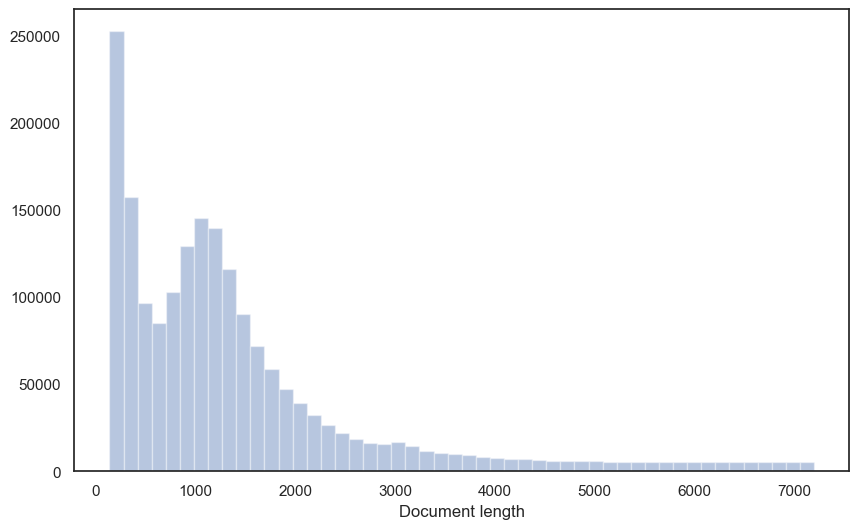

In [18]:
# Sort lengths
lns = sorted(lns)

# Take 5% as the removal size
rm_size = int(len(lns) / 100) * 5

# Now plot with removal of most/least frequent
sns.distplot(lns[rm_size:-rm_size], kde=False, axlabel='Document length')
plt.show()

### Cleaning based on document length

In [19]:
# Remove rows from the dataframe based on document length of top / bottom 5%.
min_ln = max(lns[0:rm_size])
max_ln = min(lns[-rm_size:])
noteevents = noteevents[(noteevents.TEXT.str.len() > min_ln) & (noteevents.TEXT.str.len() < max_ln)]
noteevents.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
6,180,20646,134727.0,2112-12-10,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2112-12-8**] ...
8,182,56174,163469.0,2118-08-12,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-8-10**] ...
9,183,56174,189681.0,2118-12-09,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-12-7**] ...
12,223,5350,169684.0,2143-04-30,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2143-4-25**] Discharge...


In [20]:
print(f"Length after cleaning : {len(noteevents)}")
print(f"Length of the original: {len(noteevents_original)}")

Length after cleaning : 1874558
Length of the original: 2083180


## Number of documents per patient

C:\Users\morio\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


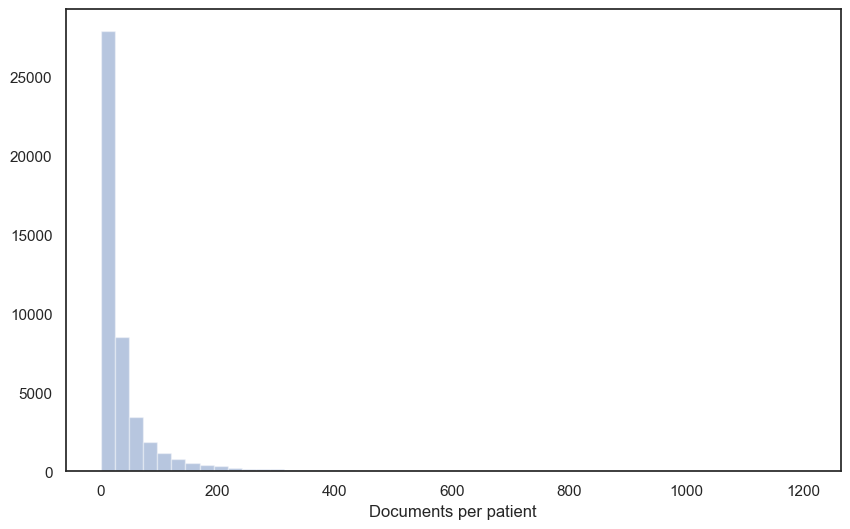

In [21]:
sns.distplot(noteevents['SUBJECT_ID'].value_counts().values, kde=False, axlabel='Documents per patient')
plt.show()

In [22]:
# Again a bit of clean-up, let's remove the bottom/top 1% of patients based on the number of 
# documents they have. 
docs_per_pt = noteevents['SUBJECT_ID'].value_counts()
docs_per_pt_vals = docs_per_pt.values
docs_per_pt_vals.sort()

rm_size = int(len(docs_per_pt_vals) / 100) * 1
min_ln = max(docs_per_pt_vals[0:rm_size])
max_ln = min(docs_per_pt_vals[-rm_size:])

keep_subject_id = set([k for k, v in docs_per_pt.iteritems() if v > min_ln and v < max_ln])
noteevents = noteevents[[True if subject_id in keep_subject_id else False 
                  for subject_id in noteevents['SUBJECT_ID'].values]]
noteevents.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
6,180,20646,134727.0,2112-12-10,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2112-12-8**] ...
8,182,56174,163469.0,2118-08-12,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-8-10**] ...
9,183,56174,189681.0,2118-12-09,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-12-7**] ...
12,223,5350,169684.0,2143-04-30,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2143-4-25**] Discharge...


In [23]:
print(f"Length after cleaning : {len(noteevents)}")
print(f"Length of the original: {len(noteevents_original)}")

Length after cleaning : 1148653
Length of the original: 2083180


C:\Users\morio\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


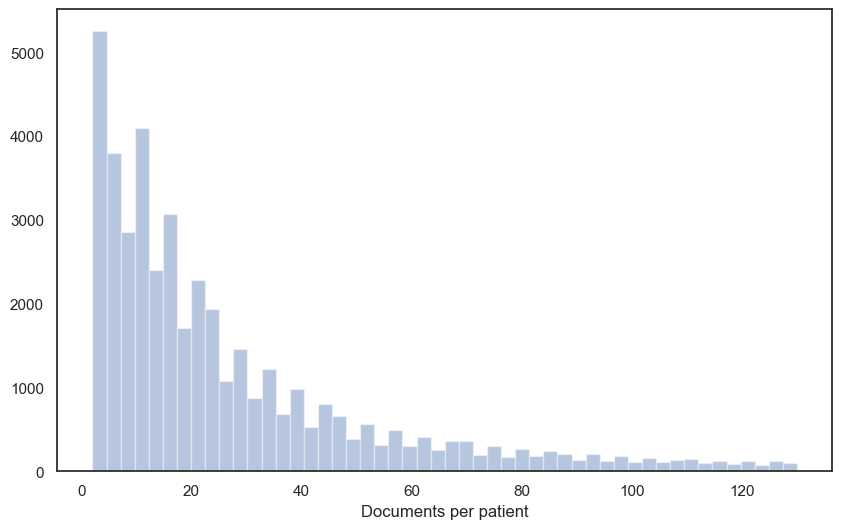

In [24]:
sns.distplot(noteevents['SUBJECT_ID'].value_counts().values, kde=False, axlabel='Documents per patient')
plt.show()

### There are different sources for the documesnt, we'll also plot that...

C:\Users\morio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


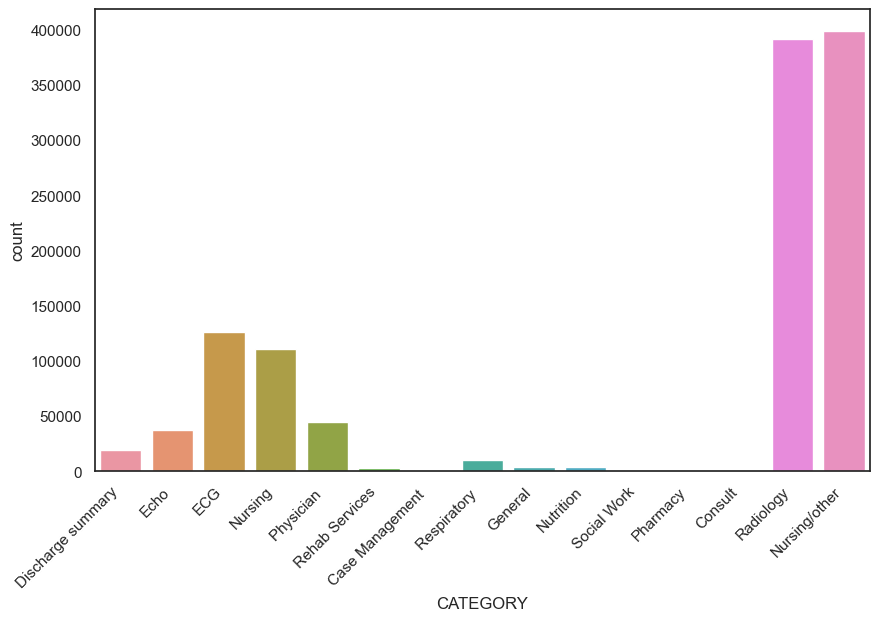

In [25]:
plot = sns.countplot(noteevents['CATEGORY'])
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Age based statistics

In [27]:
# Convert to pandas dates
noteevents['CHARTDATE'] = pd.to_datetime(noteevents['CHARTDATE'])
patients['DOB'] = pd.to_datetime(patients['DOB'])

# Add a year column
noteevents['CREATE_YEAR'] = pd.DatetimeIndex(noteevents['CHARTDATE']).year
patients['DOB_YEAR'] = pd.DatetimeIndex(patients['DOB']).year

In [28]:
# Joint noteevents with patients
pt_notes = noteevents.merge(patients, on='SUBJECT_ID', how='left')

In [29]:
pt_notes['AGE_YEAR'] = pt_notes['CREATE_YEAR'] - pt_notes['DOB_YEAR']

In [30]:
# Remove patients older than 89 and younger than 16
pt_notes = pt_notes[pt_notes['AGE_YEAR'] >= 16]
pt_notes = pt_notes[pt_notes['AGE_YEAR'] <= 89]

In [31]:
# It is possible that the cleaning above created some patients with only one document
print("Number of patients with only one doc: " + str(sum(pt_notes['SUBJECT_ID'].value_counts().values == 1)))

# Remove it there are any
remove_subject = set([k for k, v in pt_notes['SUBJECT_ID'].value_counts().iteritems() if v == 1])
pt_notes = pt_notes[~pt_notes.SUBJECT_ID.isin(remove_subject)]
print("After removal: " + str(sum(pt_notes['SUBJECT_ID'].value_counts().values == 1)))

Number of patients with only one doc: 1
After removal: 0


In [32]:
pt_notes.CATEGORY.value_counts()

Radiology            370835
Nursing/other        255380
ECG                  116919
Nursing              103684
Physician             41092
Echo                  35302
Discharge summary     16087
Respiratory            9209
General                3389
Nutrition              3330
Rehab Services         2441
Social Work            1309
Case Management         341
Consult                  50
Pharmacy                 23
Name: CATEGORY, dtype: int64

In [33]:
# We'll do the following to make sure patients do not have documents that span 
# over multiple years, meaning their age would change.
dif_pt = {}
for ind, row in pt_notes.iterrows():
    sid = row['SUBJECT_ID']
    if sid in dif_pt:
        dif_pt[sid].append(row['AGE_YEAR'])
    else:
        dif_pt[sid] = [row['AGE_YEAR']]

ehr_length = []
median_age = []
for v in dif_pt.values():
    mx = max(v)
    mi = min(v)
    median_age.append(np.median(v))
    ehr_length.append(mx - mi)

C:\Users\morio\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


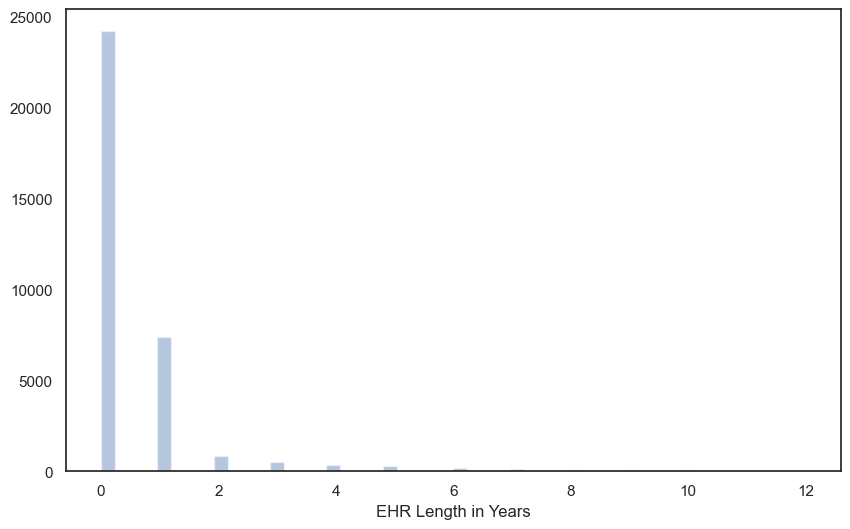

In [34]:
# We show this mainly to be sure that most patients have an EHR that spans less than 1 year 
sns.distplot(ehr_length, kde=False, axlabel='EHR Length in Years')
plt.show()

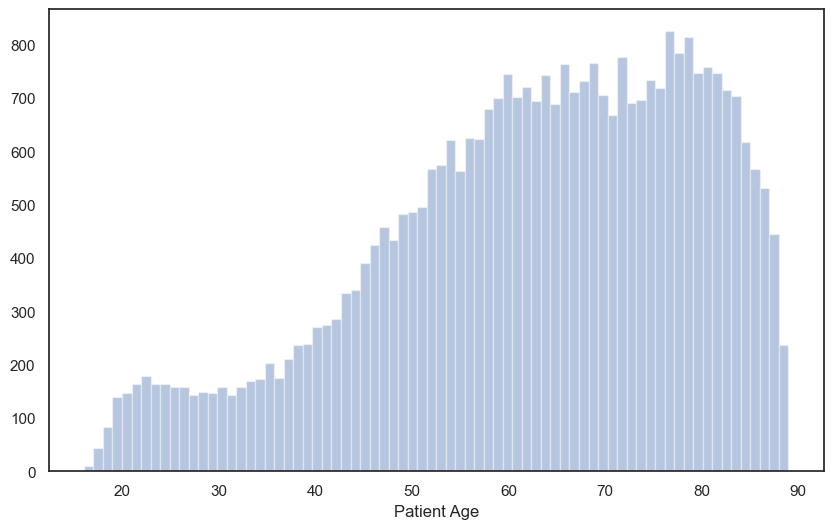

In [35]:
sns.distplot([np.round(x) for x in median_age], kde=False, bins=74, axlabel='Patient Age')
plt.show()

In [36]:
# Number of patients after/before cleaning
print(len(pt_notes['SUBJECT_ID'].unique()))
print(len(noteevents_original['SUBJECT_ID'].unique()))

34073
46146


In [37]:
# Document length after/before cleaning
print(np.average([len(str(x)) for x in pt_notes['TEXT']]))
print(np.average([len(str(x)) for x in noteevents_original['TEXT']]))

1587.502669922899
1826.0114800449312


In [38]:
# Number of documents after/before cleaning
print(len(pt_notes))
print(len(noteevents_original))

959391
2083180


In [39]:
# Min number of documents per patient after/before cleaning
print(min(pt_notes['SUBJECT_ID'].value_counts().values))
print(min(noteevents_original['SUBJECT_ID'].value_counts().values))

2
1


In [40]:
# Max number of documents per patient after/before cleaning
print(max(pt_notes['SUBJECT_ID'].value_counts().values))
print(max(noteevents_original['SUBJECT_ID'].value_counts().values))

130
1420


In [ ]:
# Save the new DF
pt_notes.to_csv(DATA_DIR + "pt_notes.csv", index=False)

In [ ]:
pt_notes.head()

End of Dataset Analysis and Preparation tutorial